# Project : IMDB BOX OFFICE PREDICTION
# DOMAIN : MACHINE LEARNING USING PYTHON

## Importing necessary libraries

In [1]:
# for ploting graph
from matplotlib import pyplot as plt
%matplotlib inline

# for data visualizations
import seaborn as sns

# for reading dataset file
import pandas as pd

# for numerical calculations
import numpy as np

# for 
from sklearn.preprocessing import LabelEncoder

# for 
from sklearn.model_selection import train_test_split

# for 
from sklearn.neighbors import KNeighborsClassifier

# for 
from sklearn import metrics

# for SVC model
from sklearn.svm import SVC

In [2]:
# to read dataset into notebook
df=pd.read_csv('IMDb.csv')
# to delete 2 columns from dataset
df.drop(['id','color'],axis='columns')

,director,criticReviews,duration,directorLikes,actor3likes,actor2,actor1likes,gross,actor1,title,...,country,contentRating,budget,year,actor2Likes,rating,aspectRatio,movieLikes,genre,subgenre
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar�,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Adventure
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End�,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action,Adventure
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre�,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action,Adventure
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises�,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action,Thriller
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens� ...,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Eric Mabius,Signed Sealed Delivered�,...,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,Comedy,Drama
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,The Following�,...,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,Crime,Drama
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,A Plague So Pleasant�,...,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,Drama,Horror
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling�,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,Comedy,Drama


In [3]:
# Copying required columns from table.
my_cols=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
df=df[my_cols]
# to display top five rows from table.
df.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,Action,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,Action,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,Action,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,Action,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,Documentary,NaN,NaN,NaN,8,7.1


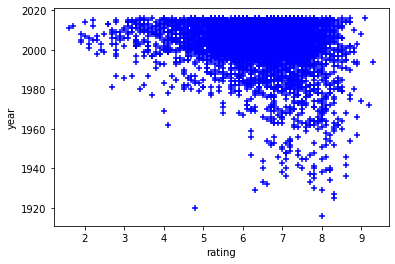

In [4]:
plt.xlabel('rating')
plt.ylabel('year')
plt.scatter(df['rating'], df['year'], color="blue", marker='+')

C:\Users\Monisha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Monisha\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


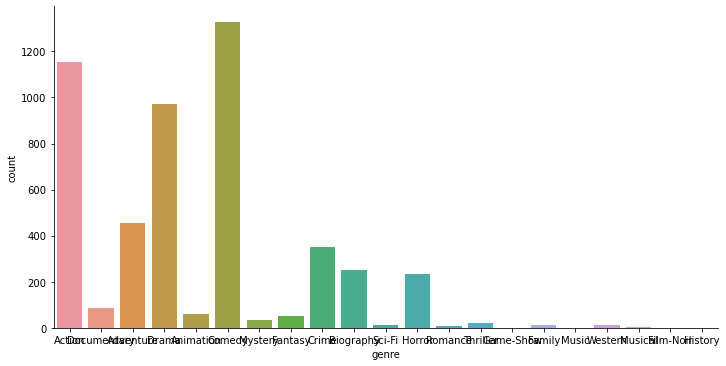

In [5]:
# Plotting the graph for genre column.
sns.factorplot(data = df, x = 'genre',kind = 'count', size = 5, aspect = 2)

In [6]:
# To find the null values
df.isnull().sum()

castTotalLikes      0
directorLikes     104
actor1likes         7
movieLikes          0
fbPosters          13
year              108
duration           15
genre               0
contentRating     303
criticReviews      50
userReviews        21
userVotes           0
rating              0
dtype: int64

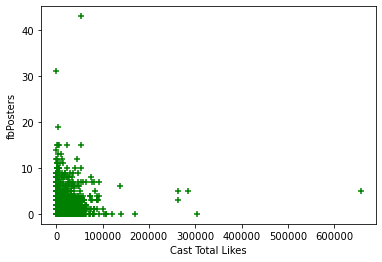

In [16]:
plt.xlabel('Cast Total Likes')
plt.ylabel('fbPosters')
plt.scatter(df['castTotalLikes'],df['fbPosters'], color="green" , marker="+")
plt.show()

In [7]:
# 
le = LabelEncoder()

In [8]:
#
df['genre']=le.fit_transform(df['genre'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,6,NaN,NaN,NaN,8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2283,2.0,637.0,84,2.0,2013.0,87.0,4,NaN,1.0,6.0,629,7.7
5039,1753,NaN,841.0,32000,1.0,NaN,43.0,5,TV-14,43.0,359.0,73839,7.5
5040,0,0.0,0.0,16,0.0,2013.0,76.0,7,NaN,13.0,3.0,38,6.3
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,PG-13,14.0,9.0,1255,6.3


In [9]:
#
df['contentRating']=le.fit_transform(df['contentRating'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,6,18,NaN,NaN,8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2283,2.0,637.0,84,2.0,2013.0,87.0,4,18,1.0,6.0,629,7.7
5039,1753,NaN,841.0,32000,1.0,NaN,43.0,5,10,43.0,359.0,73839,7.5
5040,0,0.0,0.0,16,0.0,2013.0,76.0,7,18,13.0,3.0,38,6.3
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,7,14.0,9.0,1255,6.3


In [10]:
# To make round off for null values in any field in the table.
df=df.dropna()
df.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
count,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0
mean,9944.3,696.1,6732.1,7648.0,1.4,2002.4,108.3,4.1,8.1,143.0,279.0,85870.9,6.4
std,18420.6,2832.9,15232.4,19435.4,2.0,12.5,22.5,3.7,3.0,121.4,381.5,140010.7,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,14.0,0.0,0.0,1.0,1.0,5.0,1.6
25%,1442.5,7.0,625.0,0.0,0.0,1999.0,94.0,1.0,7.0,53.0,69.0,9506.0,5.8
50%,3151.0,50.0,1000.0,170.0,1.0,2005.0,104.0,4.0,7.0,112.0,161.0,36108.0,6.5
75%,14165.0,199.5,11000.0,4000.0,2.0,2011.0,118.0,7.0,9.0,197.0,334.5,99034.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,20.0,18.0,813.0,5060.0,1689764.0,9.3


In [11]:
# 
df.corr().round(3)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.118,0.951,0.209,0.096,0.114,0.120,-0.090,-0.039,0.259,0.202,0.262,0.095
directorLikes,0.118,1.000,0.090,0.163,-0.041,-0.062,0.173,-0.008,-0.027,0.181,0.221,0.297,0.173
actor1likes,0.951,0.090,1.000,0.135,0.076,0.090,0.082,-0.064,-0.020,0.186,0.142,0.189,0.085
movieLikes,0.209,0.163,0.135,1.000,0.011,0.223,0.214,-0.075,-0.053,0.688,0.397,0.535,0.256
fbPosters,0.096,-0.041,0.076,0.011,1.000,0.060,0.029,-0.062,0.013,-0.030,-0.068,-0.026,-0.066
year,0.114,-0.062,0.090,0.223,0.060,1.000,-0.132,-0.039,0.189,0.280,0.000,0.012,-0.212
duration,0.120,0.173,0.082,0.214,0.029,-0.132,1.000,-0.075,-0.062,0.251,0.352,0.339,0.350
genre,-0.090,-0.008,-0.064,-0.075,-0.062,-0.039,-0.075,1.000,0.153,-0.087,-0.081,-0.133,-0.003
contentRating,-0.039,-0.027,-0.020,-0.053,0.013,0.189,-0.062,0.153,1.000,-0.124,-0.086,-0.094,-0.004
criticReviews,0.259,0.181,0.186,0.688,-0.030,0.280,0.251,-0.087,-0.124,1.000,0.605,0.622,0.333


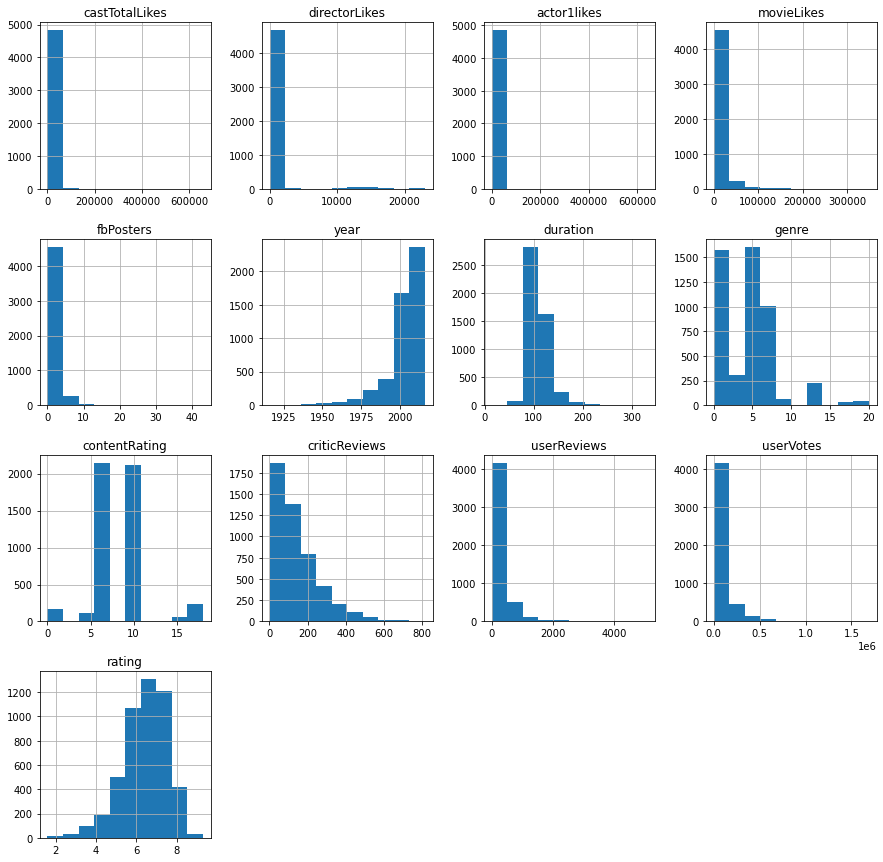

In [12]:
pd.DataFrame.hist(df,figsize=[15,15]);

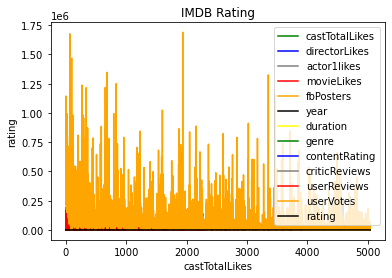

In [15]:
df.plot(color=['green','blue','gray','red','orange','black','yellow'])
plt.title('IMDB Rating')
plt.xlabel('castTotalLikes')
plt.ylabel('rating')
plt.show()

<AxesSubplot:>

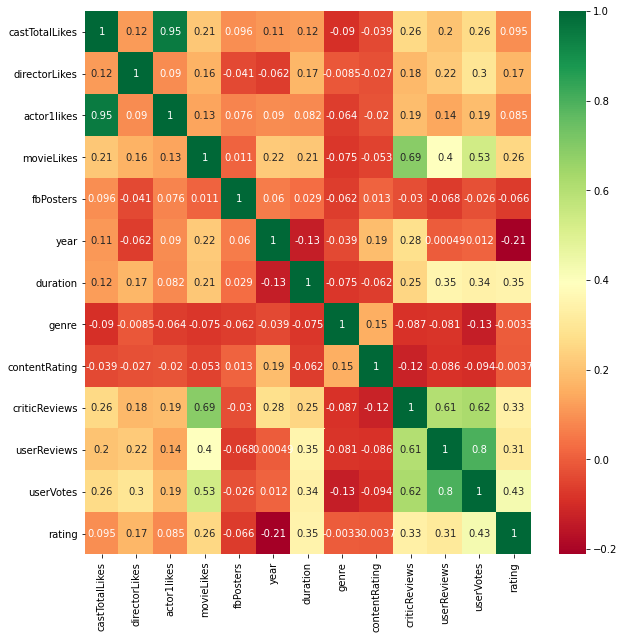

In [14]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

# Run KNN CLassifier Model

In [65]:
h=pd.DataFrame(df)
bis=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.rating,bis,labels=groups)
X=h.drop(['rating','categories'], axis=1)
y=h.categories

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)

In [53]:
model=KNeighborsClassifier(n_neighbors=5)

In [54]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
model.predict(X_test)

array(['B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B

In [56]:
model.score(X_test,y_test)

0.7720739219712526

Text(0, 0.5, 'Accuracy')

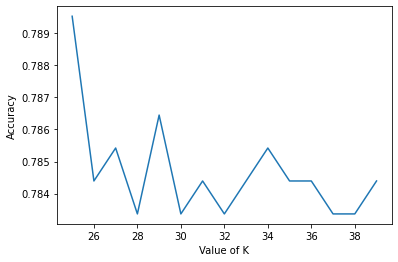

In [57]:
#Cross Validating model performance for range of 'K' neighbours

k_range=range(25,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [58]:
k_scores=pd.DataFrame(k_scores)
print('Maximum Accuracy for KNN: %f'%k_scores.max())

Maximum Accuracy for KNN: 0.789528


# Run Support Vector Machine Model

In [24]:
df.head(50)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating,categories
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9,A
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1,B
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8,B
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5,A
5,1873,475.0,640.0,24000,1.0,2012.0,132.0,0,7,462.0,738.0,212204,6.6,B
6,46055,0.0,24000.0,0,0.0,2007.0,156.0,0,7,392.0,1902.0,383056,6.2,B
7,2036,15.0,799.0,29000,1.0,2010.0,100.0,1,6,324.0,387.0,294810,7.8,A
8,92000,0.0,26000.0,118000,4.0,2015.0,141.0,0,7,635.0,1117.0,462669,7.5,B
9,58753,282.0,25000.0,10000,3.0,2009.0,153.0,1,6,375.0,973.0,321795,7.5,B
10,24450,0.0,15000.0,197000,0.0,2016.0,183.0,0,7,673.0,3018.0,371639,6.9,B


In [25]:
df[50:100]

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating,categories
51,16149,179.0,15000.0,23000,2.0,2010.0,116.0,0,7,306.0,453.0,222403,6.6,B
52,19166,0.0,16000.0,83000,0.0,2013.0,131.0,0,7,575.0,1106.0,381148,7.0,B
53,2593,0.0,894.0,46000,2.0,2011.0,154.0,0,7,428.0,899.0,326180,6.3,B
54,14959,14000.0,11000.0,5000,2.0,2008.0,122.0,0,7,470.0,2054.0,333847,6.2,B
55,696,113.0,275.0,20000,0.0,2015.0,93.0,1,6,298.0,345.0,62836,6.8,B
56,5005,56.0,2000.0,39000,0.0,2012.0,93.0,1,6,488.0,428.0,273556,7.2,B
57,1327,681.0,998.0,30000,4.0,2016.0,122.0,0,7,322.0,432.0,53607,7.5,B
58,2975,475.0,1000.0,16000,0.0,2008.0,98.0,1,1,421.0,1043.0,718837,8.4,A
59,1125,420.0,268.0,0,2.0,2007.0,91.0,0,7,162.0,221.0,121084,6.2,B
60,2144,776.0,1000.0,13000,0.0,2009.0,158.0,0,7,367.0,1055.0,283418,5.8,B


In [59]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

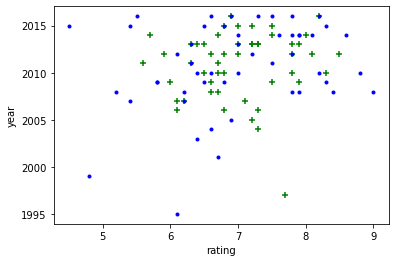

In [60]:
plt.xlabel('rating')
plt.ylabel('year')
plt.scatter(df0['rating'], df0['year'], color="green", marker='+')
plt.scatter(df1['rating'], df1['year'], color="blue", marker='.')

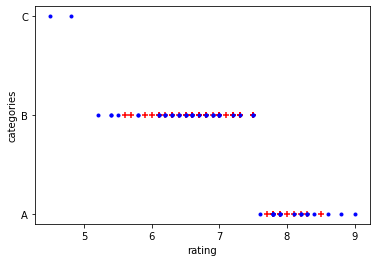

In [61]:
plt.xlabel('rating')
plt.ylabel('categories')
plt.scatter(df0['rating'], df0['categories'], color="red", marker='+')
plt.scatter(df1['rating'], df1['categories'], color="blue", marker='.')

In [62]:
X=df.drop('categories', axis='columns')
y=df.categories

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [64]:
model=SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
model.predict(X_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B

In [34]:
model.score(X_test,y_test)

0.7936344969199178

In [35]:
model_R=SVC(C=10)
model_R.fit(X_train,y_train)
model_R.score(X_test,y_test)

0.7905544147843943

In [36]:
model_G=SVC(gamma=3)
model_G.fit(X_train,y_train)
model_G.score(X_test,y_test)

0.7751540041067762

# ANN

In [37]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: oauthlib>=3.0.0 in c:\users\monisha\anaconda3\lib\site-packages (from requests-oauthlib>=0.7.0->google-auth-oauthlib<0.5,>=0.4.1->tensorboard~=2.6->tensorflow) (3.1.1)



In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
X=df.drop('categories', axis='columns')
y=df.categories

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
X_train

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
4020,15.113725,0.054902,7.843137,1.890196,0.007843,7.898039,0.360784,0.000000,0.019608,0.027451,0.039216,7.560784,0.021176
183,68.113725,2.043137,50.980392,0.000000,0.000000,7.870588,0.450980,0.000000,0.027451,1.290196,3.215686,1925.792157,0.031765
2276,3.560784,0.023529,2.121569,0.000000,0.000000,7.866667,0.482353,0.011765,0.023529,0.141176,0.694118,22.729412,0.024706
4381,15.568627,0.560784,3.921569,3.729412,0.003922,7.847059,0.541176,0.019608,0.035294,0.701961,2.000000,127.117647,0.029412
1830,12.886275,1.090196,3.309804,0.737255,0.015686,7.854902,0.470588,0.027451,0.035294,0.211765,0.203922,16.694118,0.024314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,5.392157,0.098039,3.776471,0.470588,0.003922,7.878431,0.411765,0.027451,0.062745,0.258824,0.054902,4.780392,0.023529
3805,42.066667,3.133333,11.764706,1.643137,0.000000,7.866667,0.313725,0.007843,0.035294,0.074510,0.184314,16.949020,0.016471
4809,3.172549,0.000000,1.725490,0.000000,0.000000,7.733333,0.356863,0.027451,0.035294,0.298039,0.772549,78.290196,0.032157
269,54.749020,0.921569,50.980392,0.000000,0.003922,7.870588,0.505882,0.000000,0.027451,1.388235,3.066667,1318.568627,0.028235


In [43]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
X_train_flattened.shape

In [ ]:
X_train_flattened[0]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_flattened, y_test)

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

In [ ]:
np.argmax(y_predicted[3])

In [ ]:
plt.matshow(X_test[3])

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_flattened,y_test)